# **Loading the data**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import os

trader = pd.read_csv("https://drive.google.com/uc?export=download&id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs", low_memory=False)
sentiment = pd.read_csv("https://drive.google.com/uc?export=download&id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf", low_memory=False)

print("Trader Data: Initial Inspection and Cleaning")
display(trader.head())
trader.info()

cols_to_drop_if_all_null = [col for col in trader.columns if trader[col].isnull().all()]
if cols_to_drop_if_all_null:
    print(f"\nDropping columns with all missing values: {cols_to_drop_if_all_null}")
    trader = trader.drop(columns=cols_to_drop_if_all_null)


initial_rows = len(trader)
trader_cleaned = trader.dropna().copy()
rows_after_dropping_nulls = len(trader_cleaned)
print(f"\nDropped {initial_rows - rows_after_dropping_nulls} rows with missing values in trader.")

print("\nMissing values in trader after cleaning:")
print(trader_cleaned.isnull().sum())


print("\n" + "="*50 + "\nSentiment Data: Initial Inspection and Cleaning")
display(sentiment.head())
sentiment.info()
print("\nMissing values in sentiment before cleaning:")
print(sentiment.isnull().sum())

cols_to_drop_if_all_null_sentiment = [col for col in sentiment.columns if sentiment[col].isnull().all()]
if cols_to_drop_if_all_null_sentiment:
    print(f"\nDropping columns with all missing values: {cols_to_drop_if_all_null_sentiment}")
    sentiment = sentiment.drop(columns=cols_to_drop_if_all_null_sentiment)

print("\nMissing values in sentiment after cleaning:")
print(sentiment.isnull().sum())

Trader Data: Initial Inspection and Cleaning


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Missing values in sentiment before cleaning:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in sentiment after cleaning:
timestamp         0
value             0
classification    0
date              0
dtype: int64


**Reasoning**:
Create a new markdown cell with the heading "Data Cleaning and Merging".



## **Data Cleaning and Merging**

In [20]:
trader_cleaned['Timestamp IST'] = pd.to_datetime(trader_cleaned['Timestamp IST'], errors='coerce')
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

if trader_cleaned['Timestamp IST'].dt.tz is None:
    trader_cleaned['Timestamp IST'] = trader_cleaned['Timestamp IST'].dt.tz_localize('Asia/Kolkata')
else:
    trader_cleaned['Timestamp IST'] = trader_cleaned['Timestamp IST'].dt.tz_convert('Asia/Kolkata')

if sentiment['date'].dt.tz is None:
    sentiment['date'] = sentiment['date'].dt.tz_localize('UTC')
else:
    sentiment['date'] = sentiment['date'].dt.tz_convert('UTC')

trader_cleaned['timestamp_utc'] = trader_cleaned['Timestamp IST'].dt.tz_convert('UTC')


initial_trader_cleaned_rows = len(trader_cleaned)
trader_cleaned = trader_cleaned.dropna(subset=['timestamp_utc']).copy()
rows_after_dropping_nat = len(trader_cleaned)
print(f"Dropped {initial_trader_cleaned_rows - rows_after_dropping_nat} rows with NaT in 'timestamp_utc' from trader_cleaned.")

trader_cleaned = trader_cleaned.sort_values('timestamp_utc')
sentiment = sentiment.sort_values('date')

merged_df = pd.merge_asof(
    trader_cleaned,
    sentiment.rename(columns={'date': 'sentiment_time'}),
    left_on='timestamp_utc',
    right_on='sentiment_time',
    direction='backward'
)

print("\nMerged DataFrame Info:")
merged_df.info()

print("\nFirst few rows of the merged DataFrame:")
display(merged_df.head())

print("\nValue counts of 'classification' in the merged DataFrame:")
print(merged_df['classification'].value_counts(dropna=False))

print("\nMissing sentiment data after merge:")
print(merged_df[['classification', 'value', 'sentiment_time']].isnull().sum())

Dropped 0 rows with NaT in 'timestamp_utc' from trader_cleaned.

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79225 entries, 0 to 79224
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype                       
---  ------            --------------  -----                       
 0   Account           79225 non-null  object                      
 1   Coin              79225 non-null  object                      
 2   Execution Price   79225 non-null  float64                     
 3   Size Tokens       79225 non-null  float64                     
 4   Size USD          79225 non-null  float64                     
 5   Side              79225 non-null  object                      
 6   Timestamp IST     79225 non-null  datetime64[ns, Asia/Kolkata]
 7   Start Position    79225 non-null  float64                     
 8   Direction         79225 non-null  object                      
 9   Closed PnL        79225 non-null  float64         

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp_utc,timestamp,value,classification,sentiment_time
0,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,2023-01-05 01:06:00+05:30,0.0967,Open Long,0.0,...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-01-04 19:36:00+00:00,1672810200,29,Fear,2023-01-04 00:00:00+00:00
1,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,2023-01-05 01:06:00+05:30,0.1791,Open Long,0.0,...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-01-04 19:36:00+00:00,1672810200,29,Fear,2023-01-04 00:00:00+00:00
2,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,2023-01-05 01:06:00+05:30,0.0000,Open Long,0.0,...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-01-04 19:36:00+00:00,1672810200,29,Fear,2023-01-04 00:00:00+00:00
3,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41867.0,0.0150,628.00,SELL,2023-05-12 03:11:00+05:30,0.0000,Open Short,0.0,...,4064974623,True,0.157001,1.070000e+15,1.700000e+12,2023-05-11 21:41:00+00:00,1683783000,52,Neutral,2023-05-11 00:00:00+00:00
4,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2231.0,3.8932,8685.73,BUY,2023-05-12 03:11:00+05:30,7.3187,Open Long,0.0,...,4064960965,True,2.171432,1.060000e+15,1.700000e+12,2023-05-11 21:41:00+00:00,1683783000,52,Neutral,2023-05-11 00:00:00+00:00



Value counts of 'classification' in the merged DataFrame:
classification
Greed            54097
Fear             14116
Extreme Greed     5835
Neutral           2682
Extreme Fear      2495
Name: count, dtype: int64

Missing sentiment data after merge:
classification    0
value             0
sentiment_time    0
dtype: int64


## **Feature Engineering**

In [21]:
sentiment_mapping = {
    'Extreme Fear': 1,
    'Fear': 2,
    'Neutral': 3,
    'Greed': 4,
    'Extreme Greed': 5
}
merged_df['sentiment_numeric'] = merged_df['classification'].map(sentiment_mapping)
merged_df['sentiment_lagged'] = merged_df.groupby('Account')['sentiment_numeric'].shift(1)
merged_df['sentiment_lagged'] = merged_df['sentiment_lagged'].fillna(merged_df['sentiment_numeric'])
print("\nSentiment-related features created.")


bins = merged_df['Size USD'].quantile([0, 0.25, 0.75, 1]).tolist()
labels = ['small', 'medium', 'large']

unique_bins = sorted(list(set(bins)))

if len(unique_bins) != len(labels) + 1:
    print(f"Warning: Number of unique bins ({len(unique_bins)}) does not match number of labels ({len(labels)} + 1). Adjusting bins.")
    try:
        _, unique_bins = pd.cut(merged_df['Size USD'], bins=3, labels=labels, retbins=True)
        unique_bins = sorted(list(set(unique_bins.tolist())))
        if len(unique_bins) != len(labels) + 1:
             print("Error: Could not create appropriate bins even with fallback. Skipping trade size categorization.")
             merged_df['trade_size_category'] = None
        else:
             print(f"Adjusted bins: {unique_bins}")
             merged_df['trade_size_category'] = pd.cut(merged_df['Size USD'], bins=unique_bins, labels=labels, include_lowest=True)
             print("\nTrade size categories created.")

    except Exception as e:
        print(f"Error during trade size categorization fallback: {e}")
        merged_df['trade_size_category'] = None
else:
    print(f"Using bins for trade size categories: {unique_bins}")
    merged_df['trade_size_category'] = pd.cut(merged_df['Size USD'], bins=unique_bins, labels=labels, include_lowest=True)
    print("\nTrade size categories created.")

merged_df['price_change'] = merged_df['Execution Price'].pct_change()

window_size = 10
merged_df['volatility'] = merged_df['price_change'].rolling(window=window_size).std()

merged_df['volatility'] = merged_df['volatility'].fillna(0)
print("\nPrice volatility feature created.")

merged_df['sentiment_size_interaction'] = merged_df['sentiment_numeric'] * merged_df['Size USD']

merged_df['sentiment_volatility_interaction'] = merged_df['sentiment_numeric'] * merged_df['volatility']
print("\nInteraction features created.")

print("\nFirst few rows with new features:")
display(merged_df[['classification', 'sentiment_numeric', 'sentiment_lagged',
                   'Size USD', 'trade_size_category', 'Execution Price',
                   'price_change', 'volatility', 'sentiment_size_interaction',
                   'sentiment_volatility_interaction']].head())

print("\nInfo of DataFrame after feature engineering:")
merged_df.info()


Sentiment-related features created.
Using bins for trade size categories: [0.0, 204.67, 2429.34, 3509752.98]

Trade size categories created.

Price volatility feature created.

Interaction features created.

First few rows with new features:


,classification,sentiment_numeric,sentiment_lagged,Size USD,trade_size_category,Execution Price,price_change,volatility,sentiment_size_interaction,sentiment_volatility_interaction
0,Fear,2,2.0,156.39,small,1897.9,NaN,0.0,312.78,0.0
1,Fear,2,2.0,137.08,small,1898.6,0.000369,0.0,274.16,0.0
2,Fear,2,2.0,183.53,small,1897.9,-0.000369,0.0,367.06,0.0
3,Neutral,3,3.0,628.00,medium,41867.0,21.059645,0.0,1884.00,0.0
4,Neutral,3,3.0,8685.73,large,2231.0,-0.946712,0.0,26057.19,0.0



Info of DataFrame after feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79225 entries, 0 to 79224
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype                       
---  ------                            --------------  -----                       
 0   Account                           79225 non-null  object                      
 1   Coin                              79225 non-null  object                      
 2   Execution Price                   79225 non-null  float64                     
 3   Size Tokens                       79225 non-null  float64                     
 4   Size USD                          79225 non-null  float64                     
 5   Side                              79225 non-null  object                      
 6   Timestamp IST                     79225 non-null  datetime64[ns, Asia/Kolkata]
 7   Start Position                    79225 non-null  float64                     
 8   

## Correlation Analysis and Initial Exploratory Plots

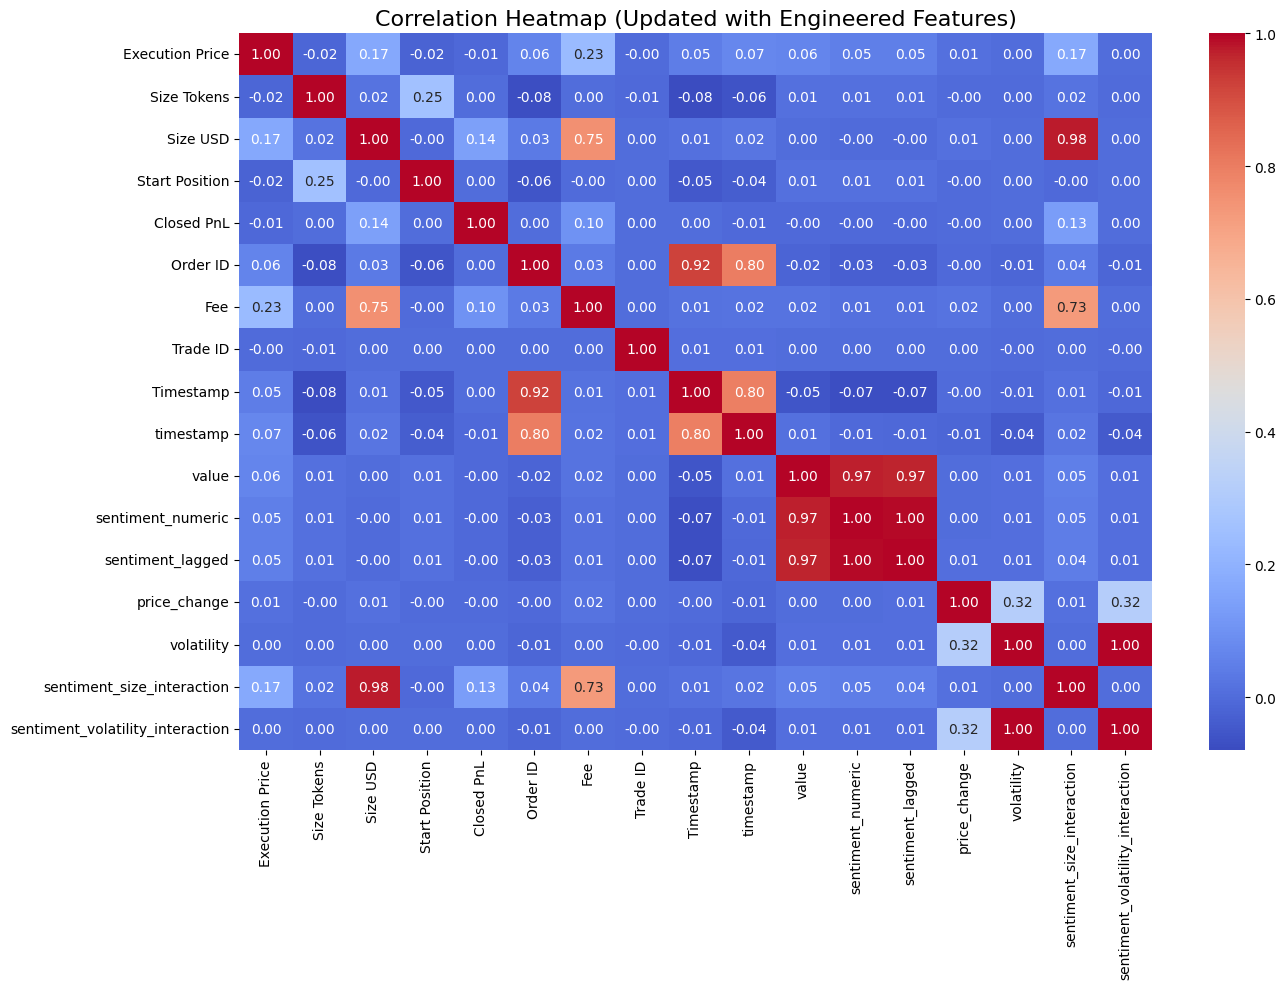

Analyzing correlations based on the updated heatmap:

Correlation with 'Closed PnL' (Engineered Features and Relevant Existing Features):
Size USD                            0.140225
sentiment_size_interaction          0.132134
volatility                          0.001548
sentiment_volatility_interaction    0.001527
price_change                       -0.000145
value                              -0.004150
sentiment_lagged                   -0.004249
sentiment_numeric                  -0.004720
timestamp                          -0.005980
Execution Price                    -0.011943
Name: Closed PnL, dtype: float64

Collinearity among engineered features and with other relevant features:
High collinearity pairs (absolute correlation > 0.7):
sentiment_lagged - sentiment_numeric: 1.00
sentiment_volatility_interaction - volatility: 1.00
Size USD - sentiment_size_interaction: 0.98
value - sentiment_numeric: 0.97
value - sentiment_lagged: 0.97


In [27]:
numeric_cols_with_new_features = merged_df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix_updated = merged_df[numeric_cols_with_new_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Updated with Engineered Features)", fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(plots_outputs_dir, "correlation_heatmap.png"))
plt.show()

print("Analyzing correlations based on the updated heatmap:")

features_for_correlation_analysis = [
    'sentiment_numeric', 'sentiment_lagged', 'price_change', 'volatility',
    'sentiment_size_interaction', 'sentiment_volatility_interaction',
    'Size USD', 'Execution Price', 'value', 'timestamp', 'Closed PnL'
]

valid_features_for_corr = [feat for feat in features_for_correlation_analysis if feat in merged_df.columns]
correlation_subset_matrix = merged_df[valid_features_for_corr].corr()


print("\nCorrelation with 'Closed PnL' (Engineered Features and Relevant Existing Features):")
if 'Closed PnL' in correlation_subset_matrix.columns:
    pnl_correlations = correlation_subset_matrix['Closed PnL'].drop('Closed PnL').sort_values(ascending=False)
    print(pnl_correlations)
else:
    print("'Closed PnL' not found in the correlation subset matrix.")


print("\nCollinearity among engineered features and with other relevant features:")

high_corr_threshold = 0.7
high_collinearity_pairs = {}

for i in range(len(correlation_subset_matrix.columns)):
    for j in range(i):
        feature1 = correlation_subset_matrix.columns[i]
        feature2 = correlation_subset_matrix.columns[j]
        corr_value = correlation_subset_matrix.iloc[i, j]

        if abs(corr_value) > high_corr_threshold:
            pair = f"{feature1} - {feature2}"
            high_collinearity_pairs[pair] = corr_value

if high_collinearity_pairs:
    print("High collinearity pairs (absolute correlation > 0.7):")
    for pair, corr_value in high_collinearity_pairs.items():
        print(f"{pair}: {corr_value:.2f}")
else:
    print("No high collinearity pairs (absolute correlation > 0.7) found among selected features.")

## Explore pnl distribution and relationships with engineered features


Analyzing Distribution of Trader PnL by Market Sentiment...


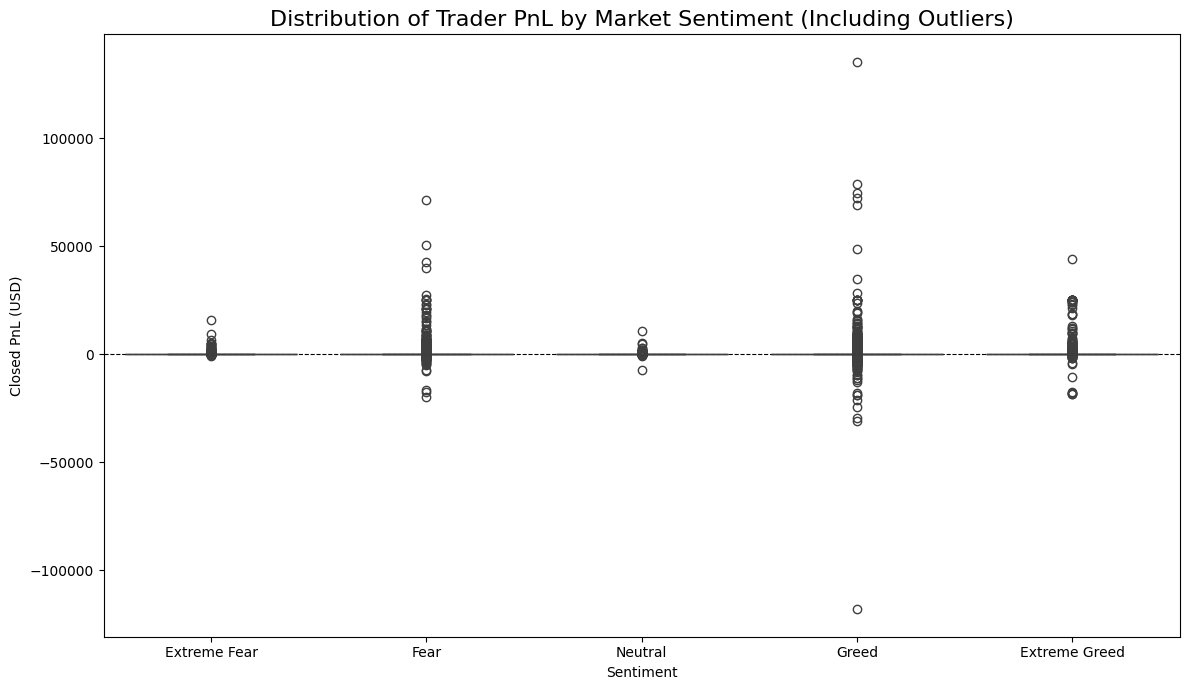

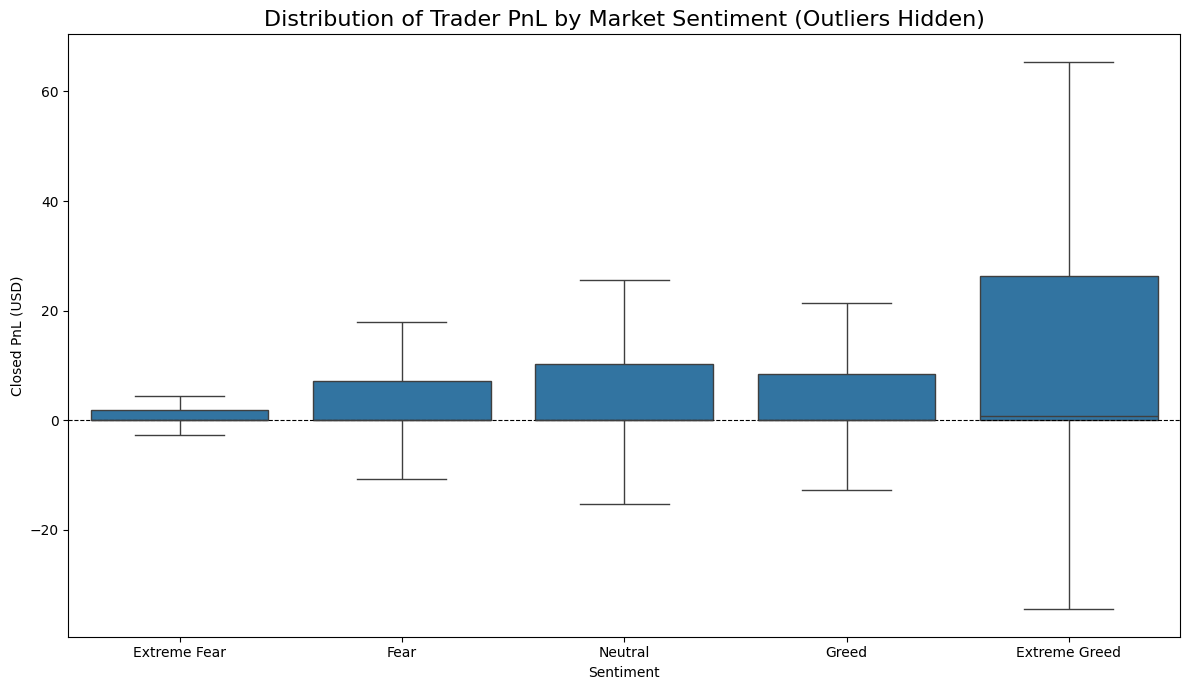


Analyzing Relationship between Sentiment and Trade Size...


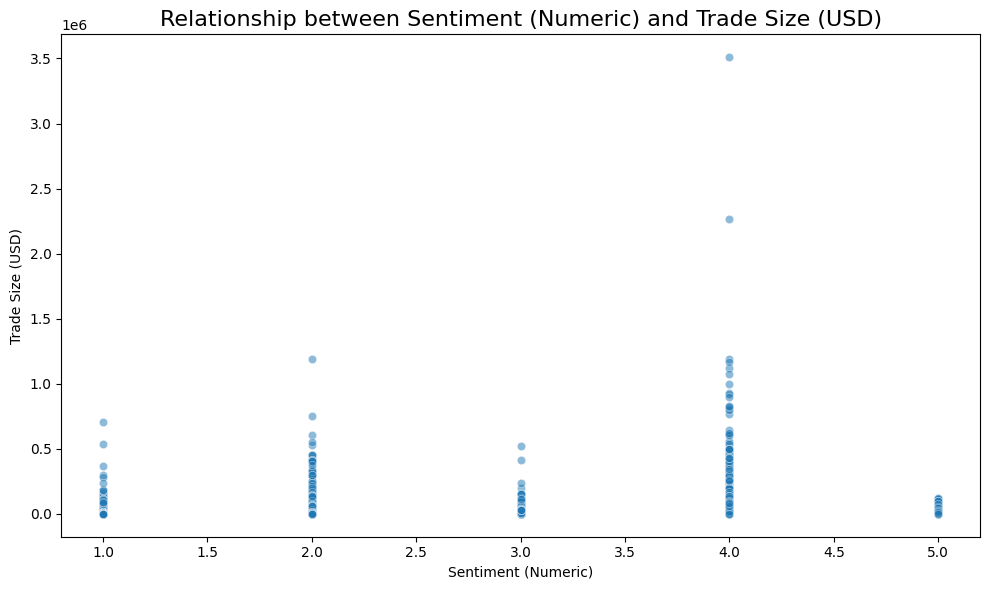


Analyzing Relationship between Volatility and Closed PnL...


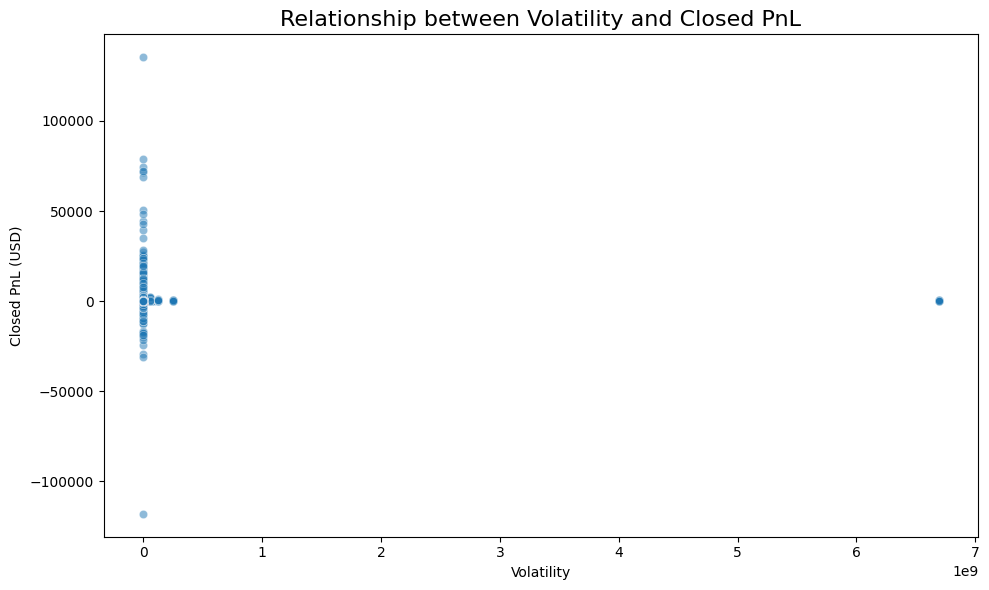

In [28]:
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

print("\nAnalyzing Distribution of Trader PnL by Market Sentiment...")
plt.figure(figsize=(12, 7))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', order=sentiment_order, showfliers=True)
plt.title('Distribution of Trader PnL by Market Sentiment (Including Outliers)', fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Closed PnL (USD)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig(os.path.join(plots_outputs_dir, "pnl_distribution_by_sentiment_with_outliers.png"))
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', order=sentiment_order, showfliers=False)
plt.title('Distribution of Trader PnL by Market Sentiment (Outliers Hidden)', fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Closed PnL (USD)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig(os.path.join(plots_outputs_dir, "pnl_distribution_by_sentiment_outliers_hidden.png"))
plt.show()

print("\nAnalyzing Relationship between Sentiment and Trade Size...")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='sentiment_numeric', y='Size USD', alpha=0.5)
plt.title('Relationship between Sentiment (Numeric) and Trade Size (USD)', fontsize=16)
plt.xlabel("Sentiment (Numeric)")
plt.ylabel("Trade Size (USD)")
plt.tight_layout()
=plt.savefig(os.path.join(plots_outputs_dir, "sentiment_vs_trade_size.png"))
plt.show()

print("\nAnalyzing Relationship between Volatility and Closed PnL...")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='volatility', y='Closed PnL', alpha=0.5)
plt.title('Relationship between Volatility and Closed PnL', fontsize=16)
plt.xlabel("Volatility")
plt.ylabel("Closed PnL (USD)")
plt.tight_layout()
plt.savefig(os.path.join(plots_outputs_dir, "volatility_vs_pnl.png"))
plt.show()


Analyzing Average PnL by Trade Size Category...


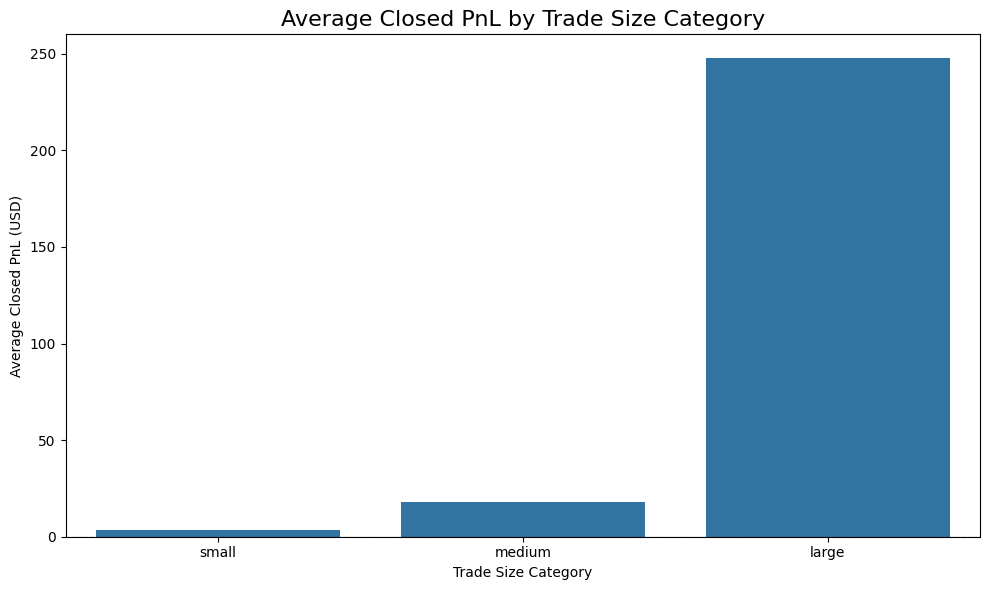


Analyzing Relationship between Interaction Features and Closed PnL...


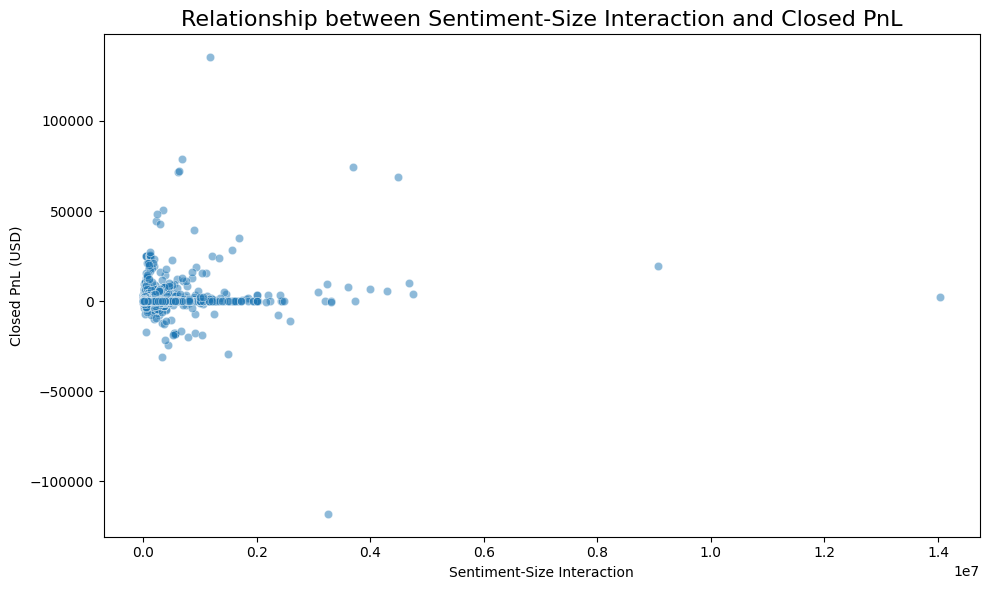

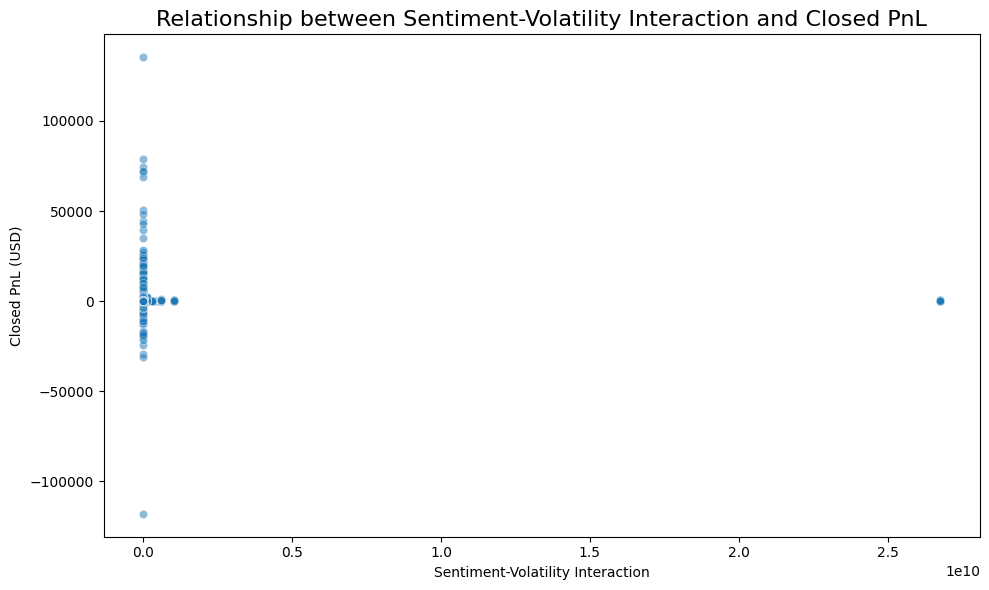


Analyzing Relationship between Fee and Closed PnL by Sentiment...


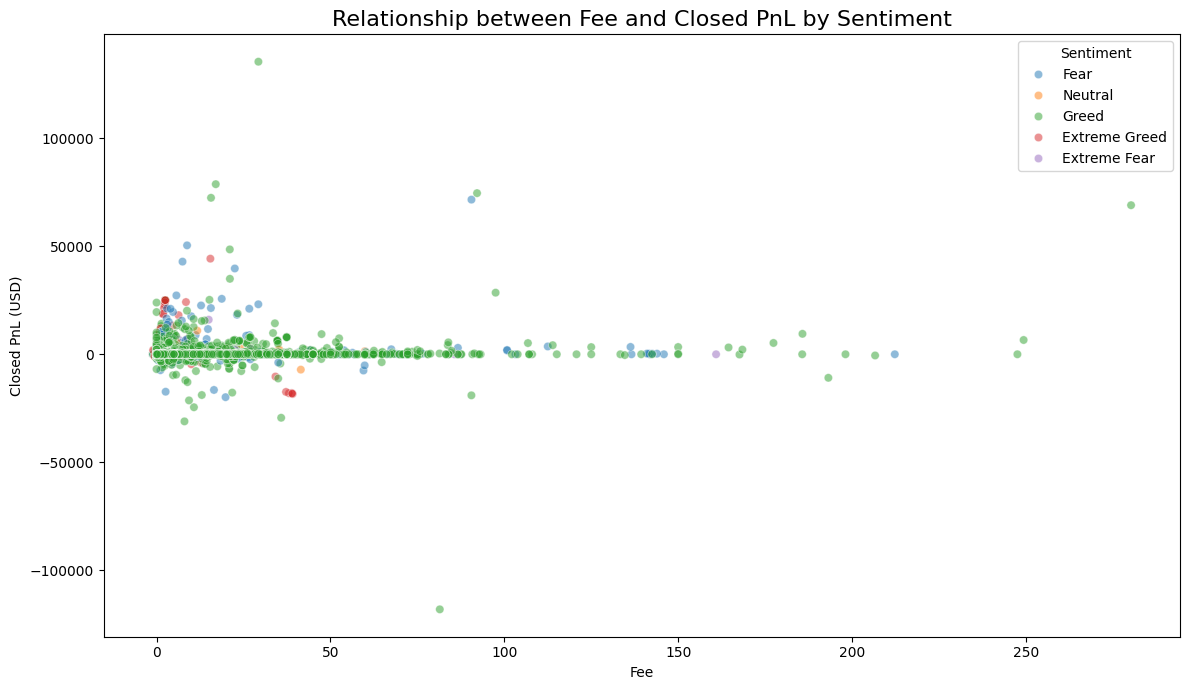

In [29]:
print("\nAnalyzing Average PnL by Trade Size Category...")
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='trade_size_category', y='Closed PnL', estimator='mean', errorbar=None)
plt.title('Average Closed PnL by Trade Size Category', fontsize=16)
plt.xlabel("Trade Size Category")
plt.ylabel("Average Closed PnL (USD)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig(os.path.join(plots_outputs_dir, "average_pnl_by_trade_size_category.png"))
plt.show()

print("\nAnalyzing Relationship between Interaction Features and Closed PnL...")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='sentiment_size_interaction', y='Closed PnL', alpha=0.5)
plt.title('Relationship between Sentiment-Size Interaction and Closed PnL', fontsize=16)
plt.xlabel("Sentiment-Size Interaction")
plt.ylabel("Closed PnL (USD)")
plt.tight_layout()
plt.savefig(os.path.join(plots_outputs_dir, "sentiment_size_interaction_vs_pnl.png"))
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='sentiment_volatility_interaction', y='Closed PnL', alpha=0.5)
plt.title('Relationship between Sentiment-Volatility Interaction and Closed PnL', fontsize=16)
plt.xlabel("Sentiment-Volatility Interaction")
plt.ylabel("Closed PnL (USD)")
plt.tight_layout()
plt.savefig(os.path.join(plots_outputs_dir, "sentiment_volatility_interaction_vs_pnl.png"))
plt.show()

print("\nAnalyzing Relationship between Fee and Closed PnL by Sentiment...")
plt.figure(figsize=(12, 7))
sns.scatterplot(data=merged_df, x='Fee', y='Closed PnL', hue='classification', alpha=0.5)
plt.title('Relationship between Fee and Closed PnL by Sentiment', fontsize=16)
plt.xlabel("Fee")
plt.ylabel("Closed PnL (USD)")
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig(os.path.join(plots_outputs_dir, "fee_vs_pnl_by_sentiment.png"))
plt.show()

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
plots_outputs_dir = '/content/drive/MyDrive/ds_jayasriram/outputs'
os.makedirs(plots_outputs_dir, exist_ok=True)
print(f"Plots will be saved to: {plots_outputs_dir}")

Mounted at /content/drive
Plots will be saved to: /content/drive/MyDrive/ds_jayasriram/outputs
